## Converting to the Functional API

So far, we have used the sequential model. The sequential model deals with the passing the data between layers and forward and back propagation of weights and biases. 

![sequential](Images/03_11.jpg) 

One problem with the sequential model is that it is based on a linear sequence of layers that are defined from input to output. This lets us create models that can handle many deep learning tasks, but some models cannot be constructed using only the sequential model.


These include networks that have multiple inputs, loops of multiple layers of neurons, and multiple outputs. The sequential model is not designed to handle these architectures. 

![Complex](Images/03_12.jpg) 

------

### Functional API

The functional API allows the user to find the layers separate from the model and then connect layers in any needed arrangement. These arrangements of layers can be treated as a single functional unit and used by multiple models. You can even create models and reference them like functional units from within other models. 

![FuncAPI](Images/03_13.jpg) 




### deep_circles_API

Remove the simple sequential model, and implement as functional API



In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


# Helper functions
def plot_data(pl, X, y):
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    
    return pl


def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1

    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)

    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    plot_data(plt, X, y)

    return plt

Using TensorFlow backend.


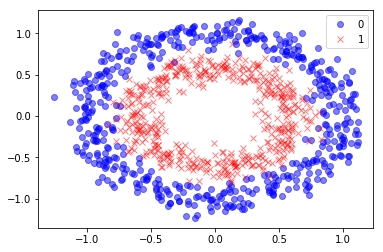

In [2]:
# Make circles
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()


# Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Define the input layer with the same shape as we did in the sequential model because we are using the same input data.

Define the variable inputs to reference the input layer.

In [3]:
# Implementing as Functional API
inputs = Input(shape=(2,))

The first hidden layer gets the output of the input layer by passing the input's reference. 

The second hidden layer's input is x, which is the first hidden layer, and we set x to reference the second hidden layer. 

The inputs of the model are the variable inputs, and the outputs of the model are the variable o. 

In [4]:
# Define hidden layers and output layer
x = Dense(4, activation='tanh', name='Hidden-1')(inputs)
x = Dense(4, activation='tanh', name='Hidden-2')(x)

o = Dense(1, activation='sigmoid', name='output_layer')(x)


# Create the model and specify the input and output
model = Model(inputs=inputs, outputs=o)


# Display the summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 632us/step - loss: 0.6877 - acc: 0.5586 - val_loss: 0.6669 - val_acc: 0.6600
Epoch 2/100
700/700 [==============================] - 0s 61us/step - loss: 0.6416 - acc: 0.6743 - val_loss: 0.6121 - val_acc: 0.7000
Epoch 3/100
700/700 [==============================] - 0s 63us/step - loss: 0.5498 - acc: 0.7657 - val_loss: 0.4858 - val_acc: 0.8033
Epoch 4/100
700/700 [==============================] - 0s 60us/step - loss: 0.3785 - acc: 0.8771 - val_loss: 0.3237 - val_acc: 0.8733
Epoch 5/100
700/700 [==============================] - 0s 61us/step - loss: 0.2433 - acc: 0.9343 - val_loss: 0.2662 - val_acc: 0.9033
Epoch 6/100
700/700 [==============================] - 0s 61us/step - loss: 0.2064 - acc: 0.9343 - val_loss: 0.2270 - val_acc: 0.9400
Epoch 7/100
700/700 [==============================] - 0s 63us/step - loss: 

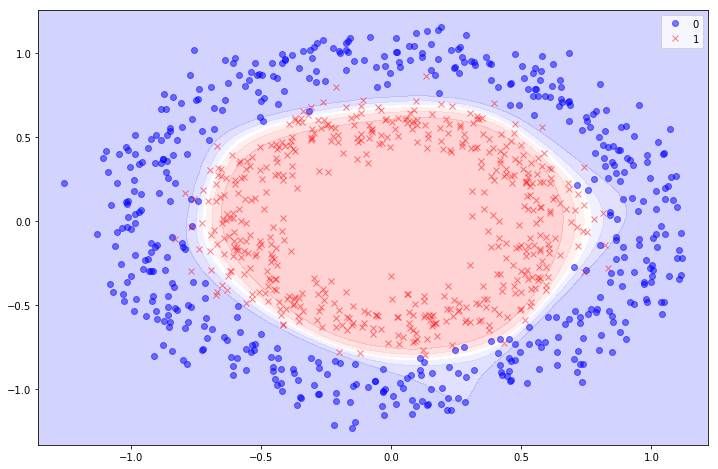

In [5]:
# Compile the model
# Minimize crossentropy for a binary
# Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])


# Defining early stopping callback
early_callback = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]

model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=early_callback, \
          validation_data=(X_test, y_test))


# Loss and Accuracy
eval_result = model.evaluate(X_test, y_test)
print("\n\nTest Loss: ", eval_result[0], "\nTest Accuracy: ", eval_result[1])


# Plotting the Decision Boundary
plot_decision_boundary(model, X, y).show()